In [48]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import math
from sklearn.linear_model import LinearRegression #remember, this is linear regression model from sk-learn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [49]:
df = pd.read_csv('funda-amsterdam.csv')
df.head()

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906


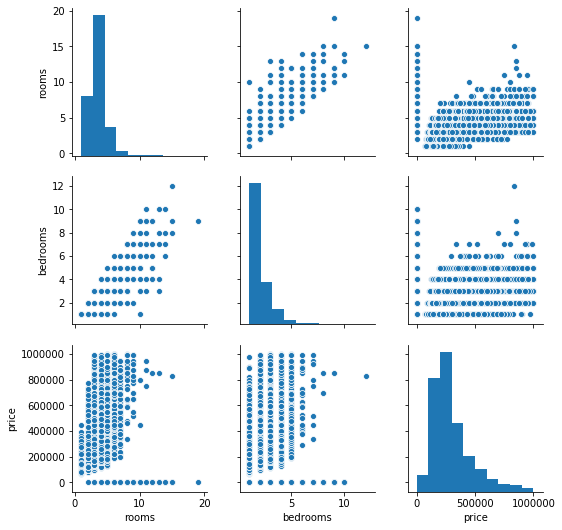

In [50]:
df_subset = df[['rooms', 'bedrooms', 'price']]
sns.pairplot(df_subset)
plt.show() #using Matplotlib to show the plot

In [51]:
df_subset = df[df["price"]>10000]
print(df_subset)

       Unnamed: 0                                address  area  bedrooms  \
0               0              Knollendamstraat 4 III/IV   108         2   
1               1                    Moerdijkstraat 47 1    47         1   
2               2                      Zeeburgerdijk 349   116         2   
3               3                 Brederodestraat 124 -1    58         2   
4               4         Admiraal De Ruijterweg 409 III    63         1   
5               5              Bertrand Russellstraat 46   125         2   
6               6           Admiraal De Ruijterweg 417 I    64         3   
7               7                  Deltastraat 10 -boven   155         3   
8               8            Ben van Meerendonkstraat 49    85         2   
9               9           Jacob van Lennepstraat 263 B    67         2   
10             10                   Spaarndammerdijk 581   100         3   
11             11          Van Reigersbergenstraat 47 II    43         1   
12          

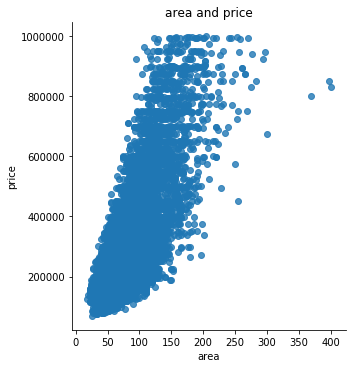

In [52]:
price = df_subset['price']
rooms = df_subset['area']

sns.lmplot(x='area', y='price', fit_reg=False, data=df_subset) #fit_reg=False leaves out the regression line; see below
plt.xlabel('area') #use matplotlib to refine Seaborn plot
plt.ylabel('price')
plt.title('area and price')
plt.show()

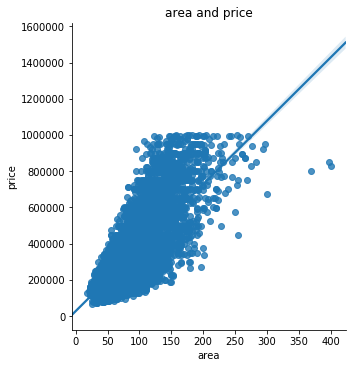

In [53]:
price = df_subset['price']
rooms = df_subset['area']

sns.lmplot(x='area', y='price', fit_reg=True, data=df_subset) #fit_reg=False leaves out the regression line; see below
plt.xlabel('area') #use matplotlib to refine Seaborn plot
plt.ylabel('price')
plt.title('area and price')
plt.show()

In [54]:
from sklearn.linear_model import LinearRegression #we need this specific model from sk-learn

#To use sk-learn, we need to create lists of the two variables
#Note that you need to use [[ ]] with x. This creates a Pandas Data Frame (table), rather than a Pandas Series (list).
#lm.fit needs a Data Frame (or matrix) for x, because x can be multiple variables
x = df_subset[['area']] #we can have multiple x
y = df_subset['price']
lm = LinearRegression() #this creates a new LR model
lm.fit(x, y) #this "fits" the model

b0 = lm.intercept_ #gets the intercept
b1 = lm.coef_[0] #lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list

print(f"The regression line is equal to y = {b0:.2f} + {b1:.2f}X") #.0f formats to 2 decimals.

The regression line is equal to y = 27983.93 + 3498.81X


$y = 27983.93 + 3498.81x$

In [55]:
df_subset['price_p'] = lm.predict(x) #use built-in predict() method to generate predictions; store in original dataframe
df_subset.head(50)

C:\Users\annem\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built,price_p
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,405855.880756
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938,192428.204791
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003,433846.395637
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910,230915.162752
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,248409.234552
5,5,Bertrand Russellstraat 46,125,2,1097 HL,20-5-2016,515000,apartment,3,9-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1991,465335.724877
6,6,Admiraal De Ruijterweg 417 I,64,3,1055 ME,14-6-2016,200000,apartment,4,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,251908.048913
7,7,Deltastraat 10 -boven,155,3,1078 PC,24-5-2016,599000,apartment,5,9-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,570300.155680
8,8,Ben van Meerendonkstraat 49,85,2,1087 LB,21-5-2016,249000,apartment,3,10-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2007,325383.150474
9,9,Jacob van Lennepstraat 263 B,67,2,1053 JE,13-5-2016,300000,apartment,3,27-5-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1900,262404.491993


In [56]:
lm.predict([[70]])

array([272900.93507299])

In [57]:
address = df_subset[df_subset['address'] == 'Slichtenhorststraat 10']
address.head()
residual = address['price'] - address['price_p']

print(f"the house on Slichtenhorstraat 10 was priced at {int(address['price'])}.")
print(f"The residual is {int(address['price_p'])}.")

the house on Slichtenhorstraat 10 was priced at 234500.
The residual is 426848.


In [58]:
df_subset['resid'] = df_subset['price'] - df_subset['price_p'] #get the residuals by subtracting the prediction from the actual views
df_subset.head()

C:\Users\annem\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built,price_p,resid
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,405855.880756,104144.119244
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938,192428.204791,22571.795209
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003,433846.395637,-108846.395637
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910,230915.162752,84084.837248
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,248409.234552,-48409.234552


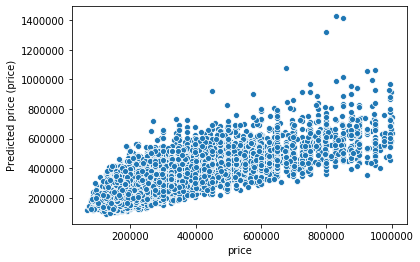

In [70]:
sns.scatterplot(x='price',y='price_p',data=df_subset)
plt.xlabel('price')
plt.ylabel('Predicted price (price)')
plt.show()

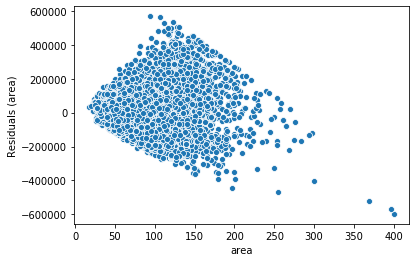

In [74]:
sns.scatterplot(x='area',y='resid',data=df_subset)
plt.xlabel('area')
plt.ylabel('Residuals (area)')
plt.show()

In [65]:
r2_score(df_subset['price'], df_subset['price_p']) #this gives the model fit (R2) for the Y and predicted Y

0.5257421182315432

The R^2 is 0.53, which means 53% of the variation in price is explained by the model.

In [76]:
math.sqrt(mean_squared_error(df_subset['price'], df_subset['price_p'])) #this gives the model fit (R2) for the Y and predicted Y

118016.87861535022

The RMSE is 118016. Which means that we are typically about 118016 off in our predicted price.

Conclusion: We can conclude that our model overshoots (predicts too high) for cheap houses, and undershoots for expensive houses (predicts too low).